In [1]:
from TrainingFunctions import loss_fn
from TransformerModules import Transformer, PTC
from TransformerModules1 import Transformer1
from Preconditioner import transformer, ptc
from Operators import d_wc
from GMRES import gmres
import torch.nn as nn
from BasicFunctions import *

In [7]:
import time

> Testing with Random input

In [3]:
x_rand = torch.rand(1, *LATTICE, GAUGE_DOF, 4, dtype=torch.complex128)

> Transformer Calculation Times

In [2]:
M = Transformer(GAUGE_FIELD, NON_GAUGE_DOF, 16, True, show_time=True)

PE in: 3.889 ms
DirectionBasedLinear in: 2057.007 ms
SuperGaugeField in: 17175.142 ms
Transformer in: 19400.098 ms


In [4]:
test = M(x_rand, show_time=True)

Q,K,V in: 35802.999 ms
Q * dagger(K) in: 998.565 ms
Activation in: 61516.304 ms
Transforming and Adding Values in: 25212.555 ms
Everything in: 123939.522 ms


> PTC Calculation Times

In [11]:
start_time = time.time()
ptc = PTC(NON_GAUGE_DOF, NON_GAUGE_DOF, PTC_PATHES, GAUGE_FIELD)
end_time = time.time()
execution_time = end_time - start_time
print(f"PTC in: {execution_time*1e3:.3f} ms")

PTC in: 1.687 ms


In [12]:
start_time = time.time()
ptc(x_rand)
end_time = time.time()
execution_time = end_time - start_time
print(f"Calculation in: {execution_time*1e3:.3f} ms")

Calculation in: 18.407 ms


> What does my Transformer with a field ???

In [5]:
M = Transformer(GAUGE_FIELD_SMALL, NON_GAUGE_DOF, 16, True)

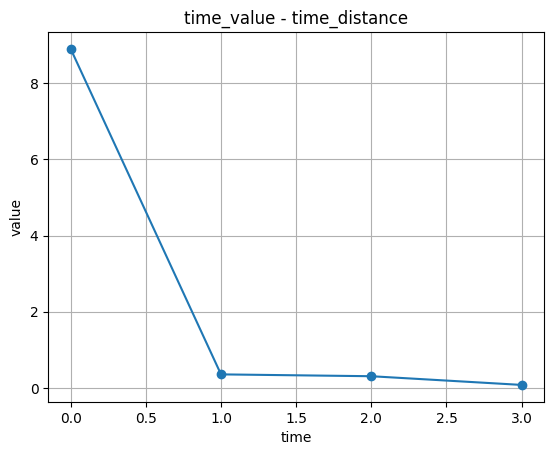

In [6]:
import matplotlib.pyplot as plt

x_one = torch.zeros(1, *LATTICE_SMALL, GAUGE_DOF, NON_GAUGE_DOF, dtype=torch.complex128)
one = torch.ones(GAUGE_DOF, NON_GAUGE_DOF)
x_one[0, 0, 0, 0, 0] = one

x_out = M(x_one)
time_values = []
for k in range(x_out.shape[3]):
    time_values.append(torch.sum(torch.abs(x_out[0,0,k,0,0]), dim=(-2,-1)).item())
time_spots = list(range(x_out.shape[3]))

plt.plot(time_spots, time_values, "o-")
plt.xlabel('time')
plt.ylabel('value')
plt.title("time_value - time_distance")
plt.grid(True)
plt.show()